In [1]:
import pandas as pd

# URL for the time series data of confirmed COVID-19 cases worldwide
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

# Load the data
covid_df = pd.read_csv(url)

# Show first 5 rows and columns
print(covid_df.head())


  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

In [2]:
# Group by Country and sum across provinces/states
covid_country = covid_df.drop(columns=['Province/State', 'Lat', 'Long']) \
                        .groupby('Country/Region').sum()

# Get the latest column (last date)
latest_date = covid_country.columns[-1]

# Sort countries by total cases on the latest date
top_countries = covid_country[latest_date].sort_values(ascending=False).head(10)

# Display top 10 countries with most total confirmed cases
print("Top 10 Countries with Total Confirmed Cases on", latest_date)
print(top_countries)


Top 10 Countries with Total Confirmed Cases on 3/9/23
Country/Region
US                103802702
India              44690738
France             39866718
Germany            38249060
Brazil             37076053
Japan              33320438
Korea, South       30615522
Italy              25603510
United Kingdom     24658705
Russia             22075858
Name: 3/9/23, dtype: int64


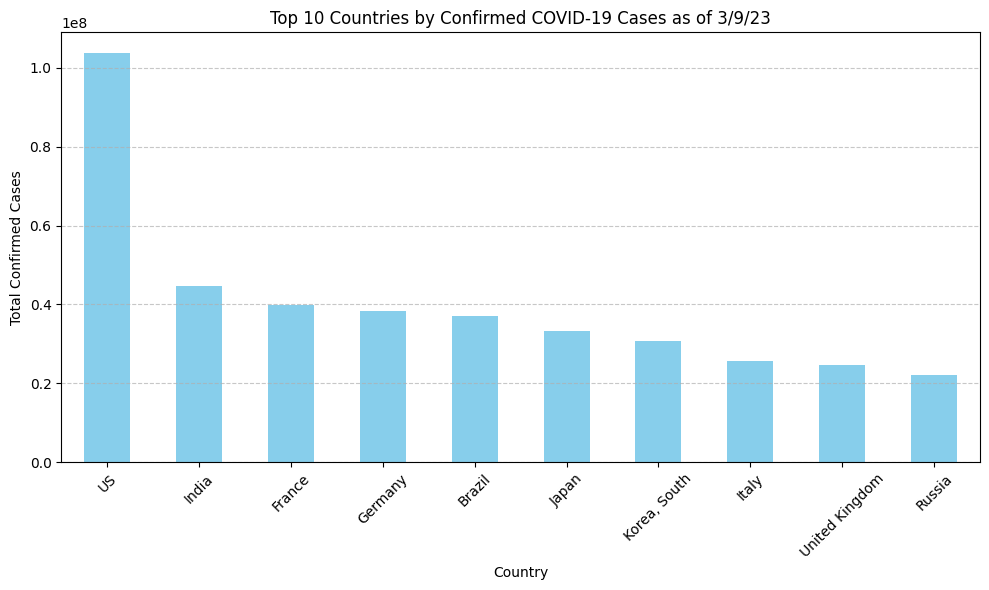

In [3]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')

plt.title(f"Top 10 Countries by Confirmed COVID-19 Cases as of {latest_date}")
plt.ylabel("Total Confirmed Cases")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


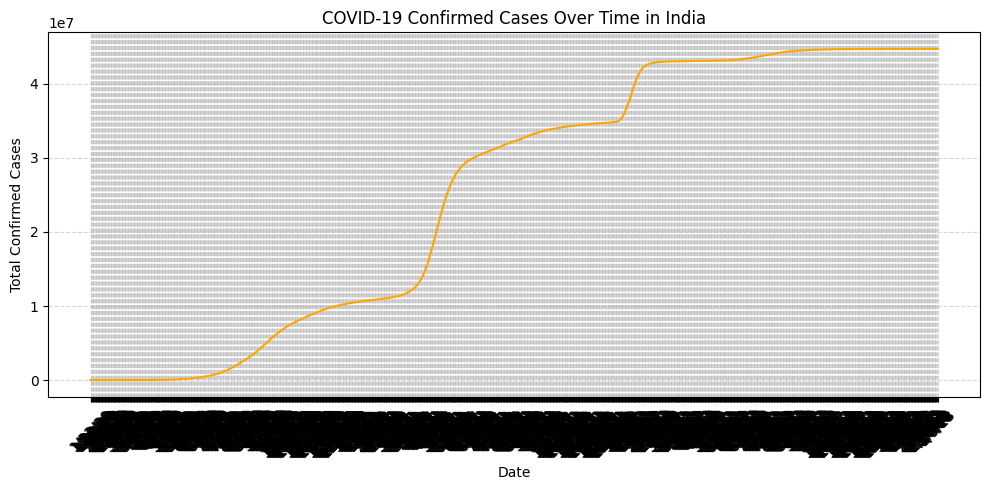

In [4]:
# Filter India's data
india_data = covid_df[covid_df['Country/Region'] == 'India'].drop(
    columns=['Province/State', 'Lat', 'Long']
).groupby('Country/Region').sum().T

# Rename column for clarity
india_data.columns = ['India']

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(india_data.index, india_data['India'], color='orange')

plt.title("COVID-19 Confirmed Cases Over Time in India")
plt.ylabel("Total Confirmed Cases")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


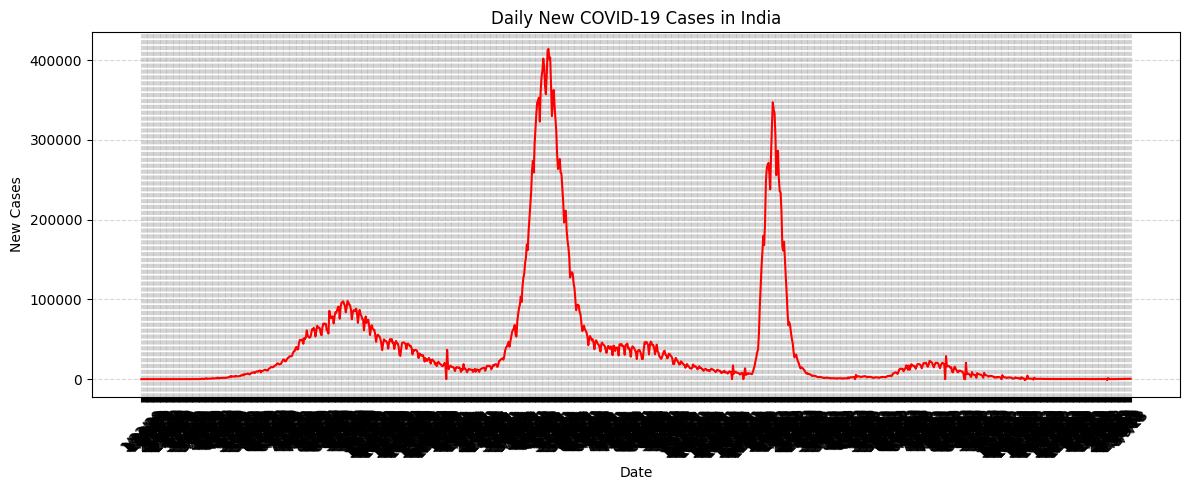

In [5]:
# Calculate daily new cases
india_data['Daily New Cases'] = india_data['India'].diff().fillna(0)

# Plot daily new cases
plt.figure(figsize=(12, 5))
plt.plot(india_data.index, india_data['Daily New Cases'], color='red')

plt.title("Daily New COVID-19 Cases in India")
plt.ylabel("New Cases")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


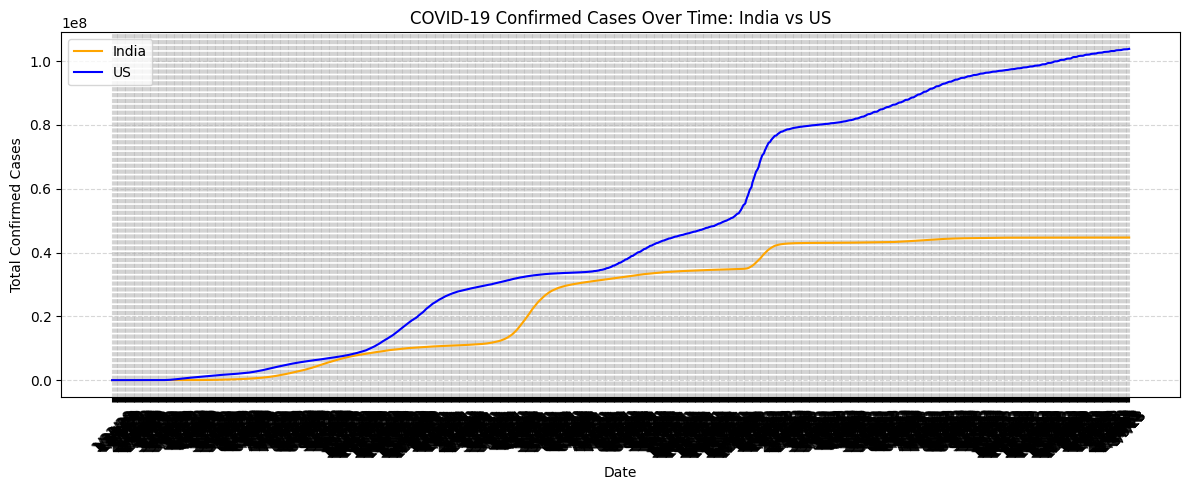

In [6]:
# Get data for India and US
compare_data = covid_df[covid_df['Country/Region'].isin(['India', 'US'])] \
    .drop(columns=['Province/State', 'Lat', 'Long']) \
    .groupby('Country/Region').sum().T

# Rename columns
compare_data.columns = ['India', 'US']

# Plot comparison
plt.figure(figsize=(12, 5))
plt.plot(compare_data.index, compare_data['India'], label='India', color='orange')
plt.plot(compare_data.index, compare_data['US'], label='US', color='blue')

plt.title("COVID-19 Confirmed Cases Over Time: India vs US")
plt.ylabel("Total Confirmed Cases")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

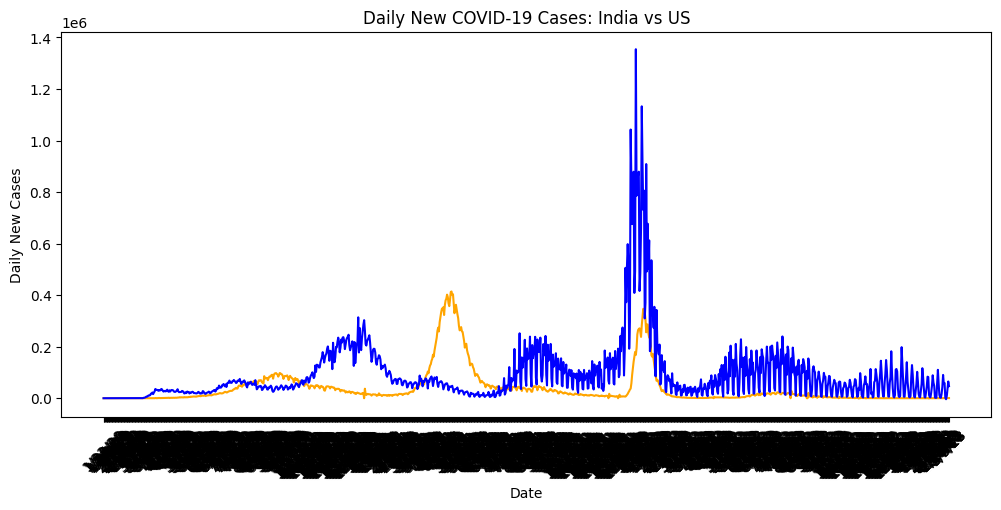

In [8]:
# Calculate daily new cases for both countries
daily_compare = compare_data.diff().fillna(0)

# Plot daily new cases
plt.figure(figsize=(12, 5))
plt.plot(daily_compare.index, daily_compare['India'], label='India', color='orange')
plt.plot(daily_compare.index, daily_compare['US'], label='US', color='blue')

plt.title("Daily New COVID-19 Cases: India vs US")
plt.ylabel("Daily New Cases")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend
